In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()
#SibSp is siblings or spouses aboard titanic and Parch is parents and children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What this shows is that for all the yellow bars there is a null value. As we can see there is a lot of data missing from Cabin and Age


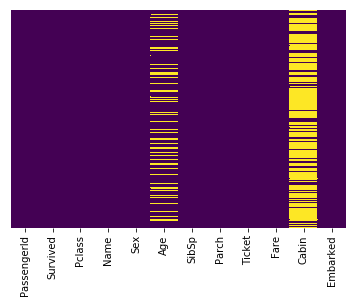

In [5]:
sns.heatmap(train.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')
print('What this shows is that for all the yellow bars there is a null value. As we can see there is a lot of data missing from Cabin and Age')

In [6]:
sns.set_style('darkgrid')

in this training set we can count the amount of survivors to the amount of deceased passengers


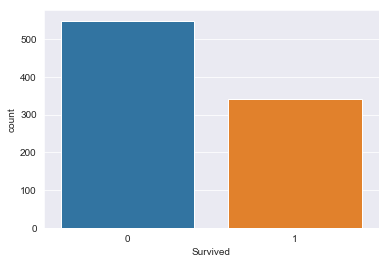

In [7]:
sns.countplot(x='Survived', data=train)
print('in this training set we can count the amount of survivors to the amount of deceased passengers')

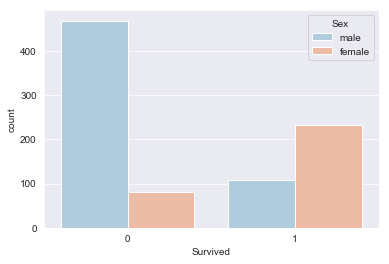

In [8]:
sns.countplot(x='Survived', hue='Sex',data=train, palette='RdBu_r')

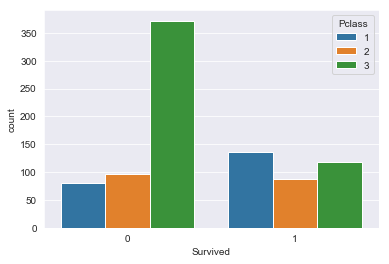

In [9]:
sns.countplot(x='Survived', hue='Pclass',data=train)

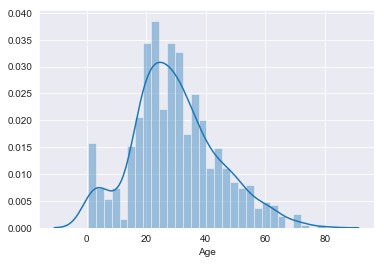

In [10]:
sns.distplot(train['Age'].dropna(),bins=30)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


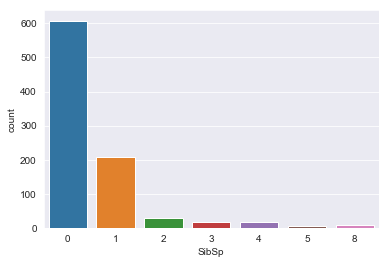

In [12]:
sns.countplot(x='SibSp', data = train)

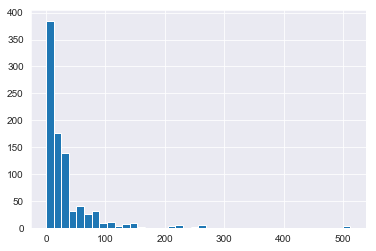

In [13]:
train.Fare.hist(bins=40)

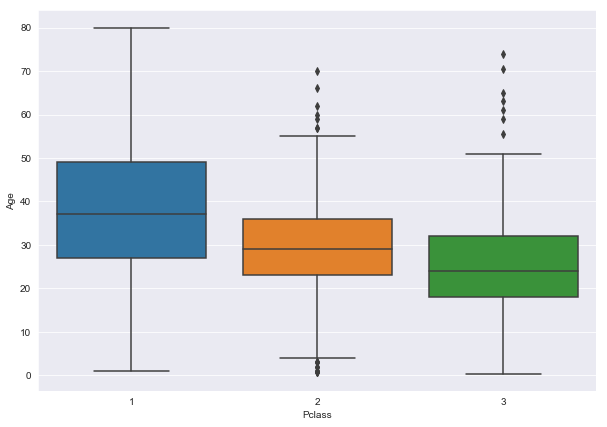

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data = train)

In [15]:
train.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [16]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    
    if pd.isnull(Age):
        if Pclass ==1:
            return train.groupby('Pclass').mean()['Age'][1]
        elif Pclass ==2:
            return train.groupby('Pclass').mean()['Age'][2]
        else:
            return train.groupby('Pclass').mean()['Age'][3]
    else:
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

Notice that age column no longer contains null values, all null values have been replaced by the mean age grouped by the passengers class


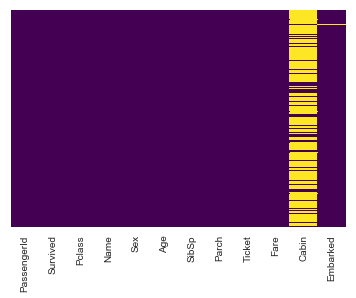

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print('Notice that age column no longer contains null values, all null values have been replaced by the mean age grouped by the passengers class')

In [19]:
train.drop('Cabin', axis = 1, inplace = True)

Now notice that the cabin column has been dropped, there are too many null values to use


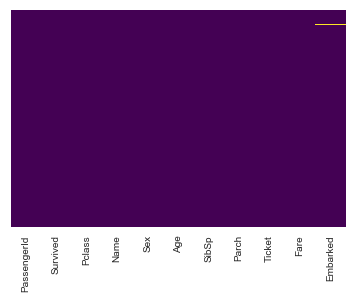

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print('Now notice that the cabin column has been dropped, there are too many null values to use')

In [21]:
train.dropna(inplace=True)

there are no longer any missing values all data is complete


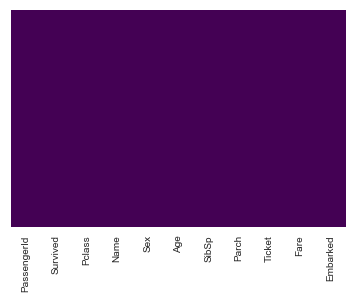

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print('there are no longer any missing values all data is complete')

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [25]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [27]:
train = pd.concat([train,sex,embarked],axis = 1)

In [32]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis = 1,inplace = True)

In [34]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [36]:
X=train.drop('Survived',axis=1)
Y=train['Survived']

In [39]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [47]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()

In [52]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [61]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)